In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [51]:
df=pd.read_csv(r"C:\Users\rakes\Skin_Cancer_detection\Liver Disease Prediction\Dataset\indian_liver_patient.csv")

In [52]:
df.shape

(583, 11)

In [53]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [54]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [55]:
df['Gender']=df['Gender'].replace({'Male':1,'Female':0})

In [56]:
#to fill the nan values
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='mean')
imputer.fit(df[['Albumin_and_Globulin_Ratio']])
df['Albumin_and_Globulin_Ratio']=imputer.transform(df[['Albumin_and_Globulin_Ratio']])

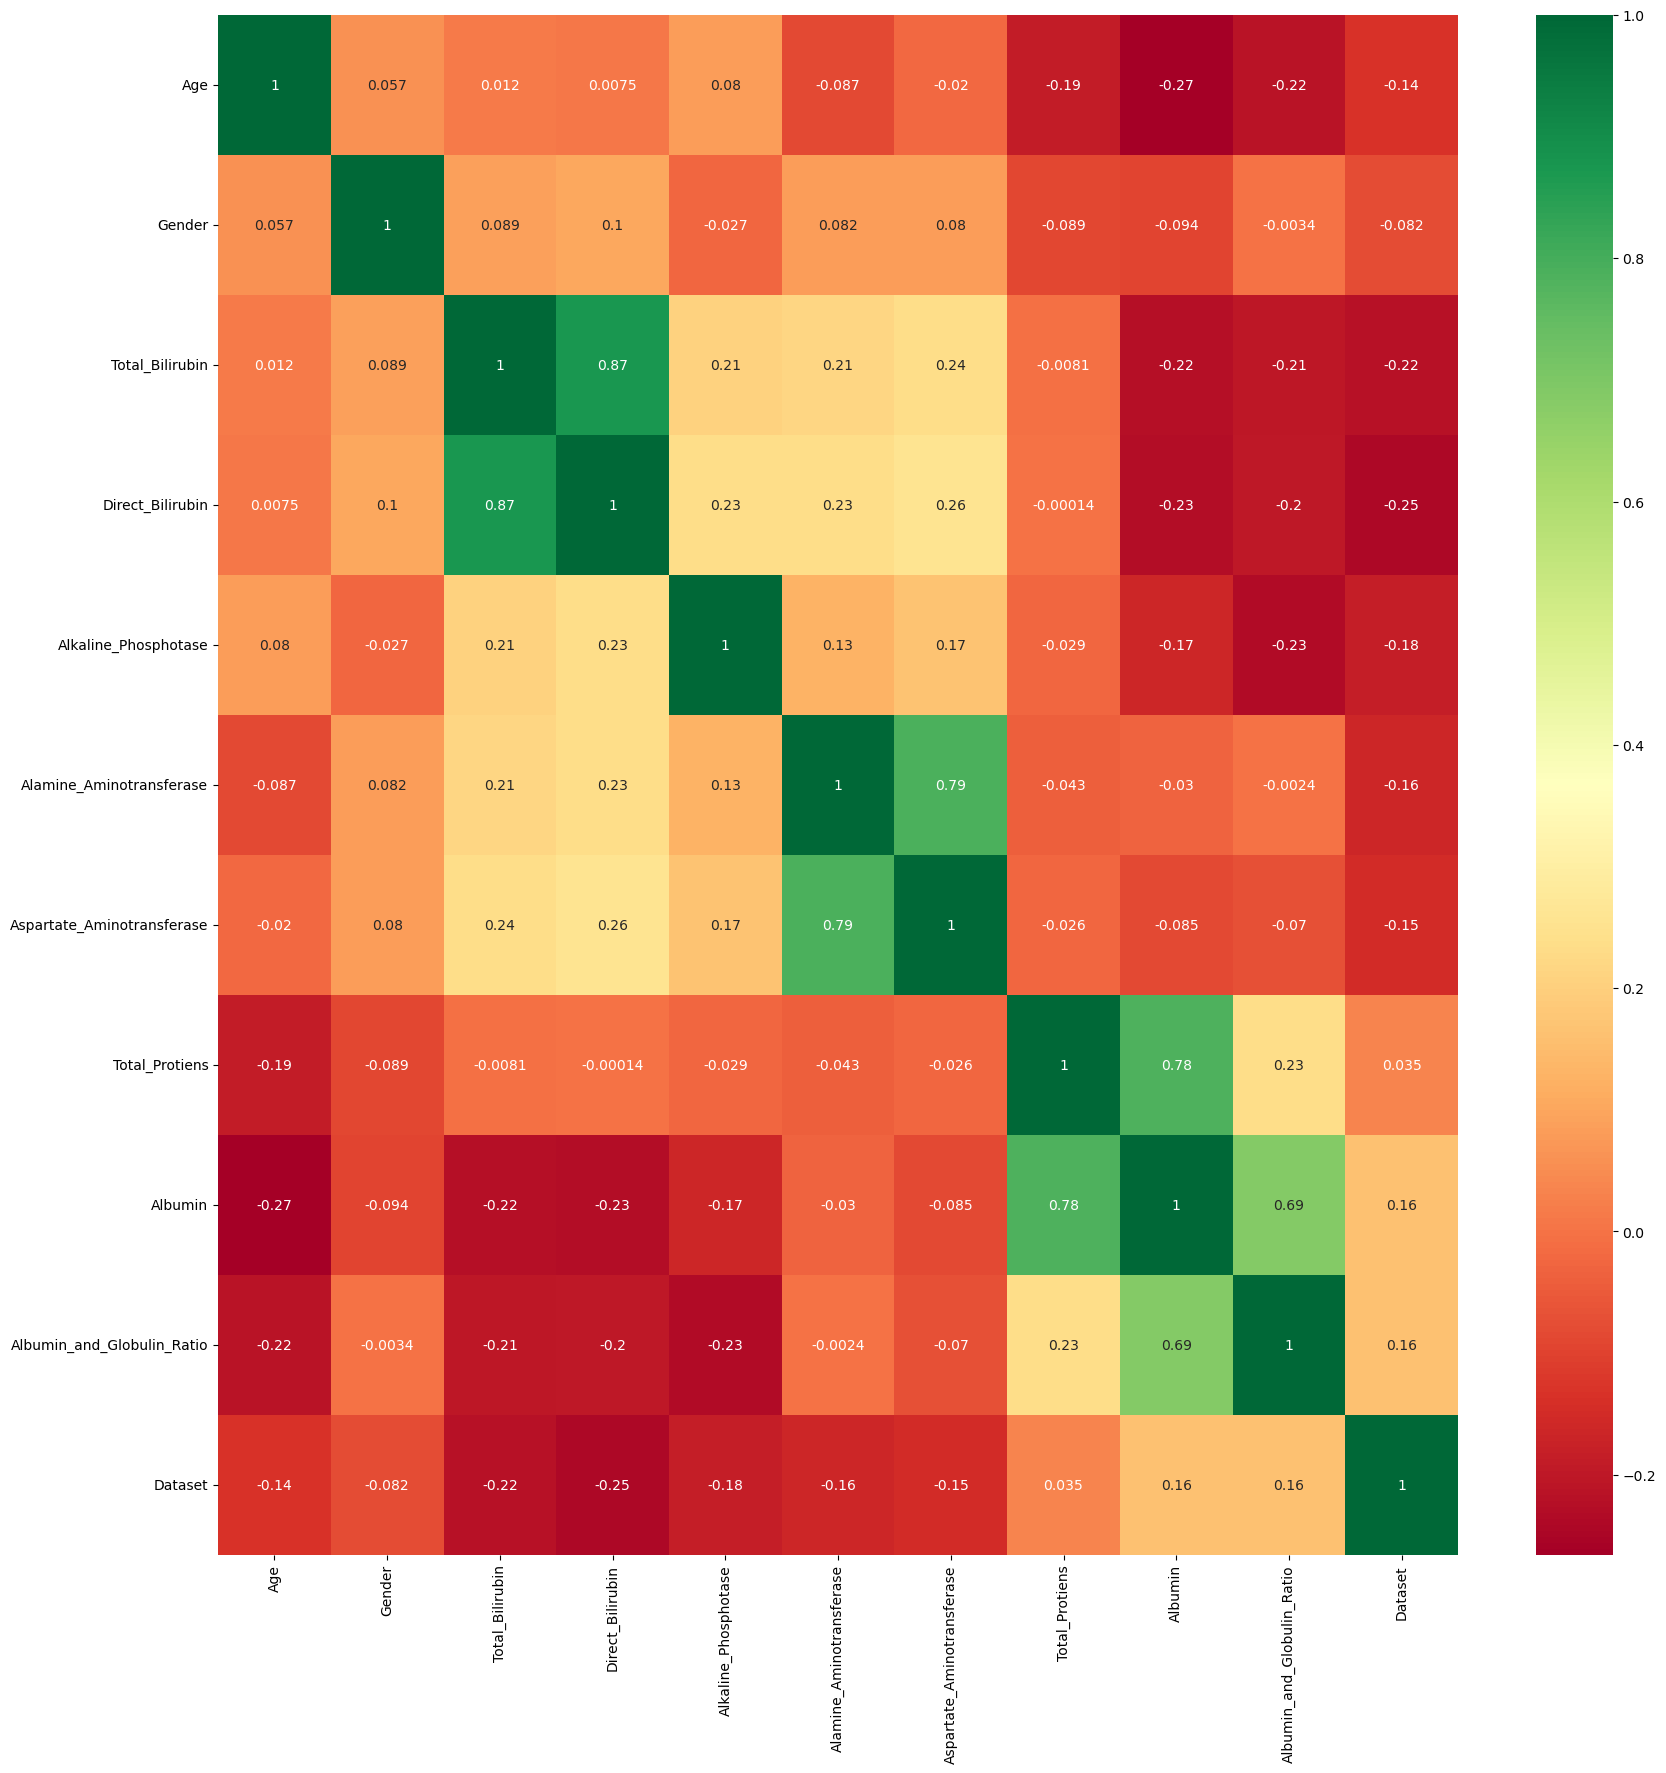

In [57]:
#to find the correlation 
import seaborn as sns
coormat=df.corr()#correlation between features in the dataset
top_corr_features=coormat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [58]:
df.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216089,-0.137351
Gender,0.056560,1.000000,0.089291,0.100436,-0.027496,0.082332,0.080336,-0.089121,-0.093799,-0.003404,-0.082416
Total_Bilirubin,0.011763,0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206159,-0.220208
Direct_Bilirubin,0.007529,0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200004,-0.246046
Alkaline_Phosphotase,0.080425,-0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233960,-0.184866
Alamine_Aminotransferase,-0.086883,0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002374,-0.163416
Aspartate_Aminotransferase,-0.019910,0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070024,-0.151934
Total_Protiens,-0.187461,-0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233904,0.035008
Albumin,-0.265924,-0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686322,0.161388
Albumin_and_Globulin_Ratio,-0.216089,-0.003404,-0.206159,-0.200004,-0.233960,-0.002374,-0.070024,0.233904,0.686322,1.000000,0.162319


In [59]:
#to check the target class are of equal size
Liver_true_count=len(df.loc[df['Dataset']==1])#1 represent its a liver disease patient
Liver_false_count=len(df.loc[df['Dataset']==2])#2 represent non liver patient
(Liver_true_count,Liver_false_count)

(416, 167)

In [60]:
y=df['Dataset']
X=df.drop(['Dataset'],axis=1)

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Create a logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Evaluate the model on the testing data
score = model.score(X_test, y_test)

# Print the accuracy score
print("Accuracy:", score*100)

Accuracy: 70.85714285714285


In [62]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
score=model.score(X_test,y_test)
print('Accuracy:',score*100)

Accuracy: 69.14285714285714


In [63]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# Create a SVM classifier object
model = svm.SVC(kernel='linear', C=1, gamma='auto')

# Train the model using the training set
model.fit(X_train, y_train)

# Use the trained model to make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy*100)

Accuracy: 69.71428571428572


In [64]:
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.preprocessing import StandardScaler


# Train the KNN model with K=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Use the trained KNN model to make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy*100)

Accuracy: 65.14285714285715


In [69]:
#now using random forest classifier
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
#fit the model to training data
model.fit(X_train,y_train)
score=model.score(X_test,y_test)
print("Accuracy:",score*100)

Accuracy: 71.42857142857143


In [71]:
# Get user input
Age = int(input("Enter the age: "))
Gender = int(input("Enter the gender (0 for female, 1 for male): "))
Total_Bilirubin = float(input("Enter the total bilirubin level: "))
Direct_Bilirubin = float(input("Enter the direct bilirubin level: "))
Alkaline_Phosphotase = int(input("Enter the alkaline phosphotase level: "))
Alamine_Aminotransferase = int(input("Enter the alamine aminotransferase level: "))
Aspartate_Aminotransferase = int(input("Enter the aspartate aminotransferase level: "))
Total_Protiens = float(input("Enter the total proteins level: "))
Albumin = float(input("Enter the albumin level: "))
Albumin_and_Globulin_Ratio = float(input("Enter the albumin and globulin ratio: "))

# Make a prediction using the trained model
user_input = np.array([[Age, Gender, Total_Bilirubin, Direct_Bilirubin, Alkaline_Phosphotase, 
                        Alamine_Aminotransferase, Aspartate_Aminotransferase, Total_Protiens, 
                        Albumin, Albumin_and_Globulin_Ratio]])
prediction=model.predict(user_input)
if (prediction==1):
        print("You are a liver patient")
else:
        print("No you are not a liver patient")

Enter the age: 55
Enter the gender (0 for female, 1 for male): 1
Enter the total bilirubin level: 0.7
Enter the direct bilirubin level: 0.2
Enter the alkaline phosphotase level: 290
Enter the alamine aminotransferase level: 53
Enter the aspartate aminotransferase level: 58
Enter the total proteins level: 6.8
Enter the albumin level: 3.4
Enter the albumin and globulin ratio: 1
You are a liver patient


In [75]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Precision:", precision*100)
print("Recall:", recall*100)
print("F1 Score:", f1*100)
#print("AUC Score:", auc)

Precision: 72.93233082706767
Recall: 79.50819672131148
F1 Score: 76.07843137254902


In [76]:
import pickle
filename='Liver_disease_model'
pickle.dump(model,open(filename,'wb'))